# CSE 571(Data Mining) Fall 19 Project- PHASE 1
## Project AIM- Given a TS, predict if a MEAL was taken or not
## Phase AIM- Extract features from training data, pass through PCA & prove their importance
### TASKS:
#### a) Extract 4 (one for each student) different types of time series features from only the CGM data cell array and CGM timestamp cell array (10 points each) total 40
#### b) For each time series explain why you chose such feature (5 points each) total 20
#### c) Show values of each of the features and argue that your intuition in step b is validated or disproved? (5 points each ) total 20
#### d) Create a feature matrix where each row is a collection of features from each time series. So if there are 75 time series and your feature length after concatenation of the 4 types of features is 17 then the feature matrix size will be 75 X 17 (10 points)
#### e) Provide this feature matrix to PCA and derive the new feature matrix. Choose the top 5 features and plot them for each time series. (5 points)
#### f) For each feature in the top 5 argue why it is chosen as a top five feature in PCA? (3 points each) total 15

### STEPS:
#### 1. Load data(CGM values & time-series)
#### 2. Convert TS values and reverse data into chronological order
#### 3. EDA & plots
#### 4. Feature extraction- Windowed Mean, Maximum Windowed Velocity, FFT & Entropy
#### 6. PCA
#### 7. Prove results & plots

*  ### Packages

In [1]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pandas import read_csv
from pandas import concat
from pandas import DataFrame

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

import scipy.stats

* ### Load Data

In [2]:
KaggleInput = "/kaggle/input/"
CGMTimeCSV = KaggleInput + "continuous-blood-glucose-monitor-data/CGMDatenumLunchPat1.csv"
CGMValueCSV = KaggleInput + "continuous-blood-glucose-monitor-data/CGMSeriesLunchPat1.csv"

In [3]:
# display data sample
CGMDatenum = pd.read_csv(CGMTimeCSV)
CGMSeries = pd.read_csv(CGMValueCSV)

CGMDatenum.head()

,cgmDatenum_ 1,cgmDatenum_ 2,cgmDatenum_ 3,cgmDatenum_ 4,cgmDatenum_ 5,cgmDatenum_ 6,cgmDatenum_ 7,cgmDatenum_ 8,cgmDatenum_ 9,cgmDatenum_10,...,cgmDatenum_22,cgmDatenum_23,cgmDatenum_24,cgmDatenum_25,cgmDatenum_26,cgmDatenum_27,cgmDatenum_28,cgmDatenum_29,cgmDatenum_30,cgmDatenum_31
0,737225.584155,737225.580683,737225.577211,737225.573738,737225.570266,737225.566794,737225.563322,737225.559850,737225.556377,737225.552905,...,737225.511238,737225.507766,737225.504294,737225.500822,737225.497350,737225.493877,737225.490405,737225.486933,737225.483461,737225.479988
1,737217.627778,737217.624306,737217.620833,737217.617361,737217.613889,737217.610417,737217.606944,737217.603472,737217.600000,737217.596528,...,737217.554861,737217.551389,737217.547917,737217.544444,737217.540972,737217.537500,737217.534028,737217.530556,737217.527083,NaN
2,737216.551319,737216.547847,737216.544375,737216.540903,737216.537431,737216.533958,737216.530486,737216.527014,737216.523542,737216.520069,...,737216.478403,737216.474931,737216.471458,737216.467986,737216.464514,737216.461042,737216.457569,737216.454097,737216.450625,NaN
3,737215.572095,737215.568623,737215.565150,737215.561678,737215.558206,737215.554734,737215.551262,737215.547789,737215.544317,737215.540845,...,737215.499178,737215.495706,737215.492234,737215.488762,737215.485289,737215.481817,737215.478345,737215.474873,737215.471400,737215.467928
4,737201.589410,737201.585938,737201.582465,737201.578993,737201.575521,737201.572049,737201.568576,737201.565104,737201.561632,737201.558160,...,737201.516493,737201.513021,737201.509549,737201.506076,737201.502604,737201.499132,737201.495660,737201.492188,737201.488715,NaN


In [4]:
CGMSeries.head()

,cgmSeries_ 1,cgmSeries_ 2,cgmSeries_ 3,cgmSeries_ 4,cgmSeries_ 5,cgmSeries_ 6,cgmSeries_ 7,cgmSeries_ 8,cgmSeries_ 9,cgmSeries_10,...,cgmSeries_22,cgmSeries_23,cgmSeries_24,cgmSeries_25,cgmSeries_26,cgmSeries_27,cgmSeries_28,cgmSeries_29,cgmSeries_30,cgmSeries_31
0,256,258,260,258,254,252,246,241,236,228,...,99,98,99,97,91,91,90,91,92,91.0
1,260,273,283,292,303,310,316,325,335,341,...,310,294,284,275,269,261,245,232,216,NaN
2,232,237,248,257,263,269,274,271,269,266,...,136,134,132,127,126,124,123,123,123,NaN
3,228,231,222,216,215,215,213,212,211,206,...,93,92,89,96,94,94,94,95,94,92.0
4,137,137,139,141,147,152,155,157,157,158,...,128,121,120,120,120,120,120,121,123,NaN


* ### Convert TS type & timeline to chronological order

In [5]:
# Convert TS datatype and reverse indexing for chronological order
CGMDatenum = CGMDatenum.applymap(lambda i : pd.to_datetime(i - 719529, unit='D'))
CGMDatenum = CGMDatenum.iloc[::-1]
CGMDatenum = CGMDatenum.iloc[:, ::-1]

CGMDatenum_updated = CGMDatenum.copy()
CGMDatenum_updated.head()

,cgmDatenum_31,cgmDatenum_30,cgmDatenum_29,cgmDatenum_28,cgmDatenum_27,cgmDatenum_26,cgmDatenum_25,cgmDatenum_24,cgmDatenum_23,cgmDatenum_22,...,cgmDatenum_10,cgmDatenum_ 9,cgmDatenum_ 8,cgmDatenum_ 7,cgmDatenum_ 6,cgmDatenum_ 5,cgmDatenum_ 4,cgmDatenum_ 3,cgmDatenum_ 2,cgmDatenum_ 1
32,2017-11-06 12:33:21.999974400,2017-11-06 12:38:21.999955200,2017-11-06 12:43:22.000022400,2017-11-06 12:48:22.000003200,2017-11-06 12:53:21.999984000,2017-11-06 12:58:21.999964800,2017-11-06 13:03:22.000032000,2017-11-06 13:08:22.000012800,2017-11-06 13:13:21.999993600,2017-11-06 13:18:21.999974400,...,2017-11-06 14:18:22.000003200,2017-11-06 14:23:21.999984000,2017-11-06 14:28:21.999964800,2017-11-06 14:33:22.000032000,2017-11-06 14:38:22.000012800,2017-11-06 14:43:21.999993600,2017-11-06 14:48:21.999974400,2017-11-06 14:53:21.999955200,2017-11-06 14:58:22.000022400,2017-11-06 15:03:22.000003200
31,NaT,2017-11-08 11:42:03.999974400,2017-11-08 11:47:04.000041600,2017-11-08 11:52:04.000022400,2017-11-08 11:57:04.000003200,2017-11-08 12:02:03.999983999,2017-11-08 12:07:03.999964800,2017-11-08 12:12:04.000032000,2017-11-08 12:17:04.000012800,2017-11-08 12:22:03.999993600,...,2017-11-08 13:22:06.000009600,2017-11-08 13:27:05.999990400,2017-11-08 13:32:05.999971200,2017-11-08 13:37:06.000038400,2017-11-08 13:42:06.000019200,2017-11-08 13:47:06.000000000,2017-11-08 13:52:05.999980800,2017-11-08 13:57:05.999961600,2017-11-08 14:02:06.000028800,2017-11-08 14:07:06.000009600
30,NaT,2017-11-09 11:27:09.000000000,2017-11-09 11:32:08.999980800,2017-11-09 11:37:08.999961600,2017-11-09 11:42:09.000028800,2017-11-09 11:47:09.000009600,2017-11-09 11:52:08.999990400,2017-11-09 11:57:08.999971200,2017-11-09 12:02:09.000038400,2017-11-09 12:07:09.000019200,...,2017-11-09 13:07:08.999961600,2017-11-09 13:12:09.000028800,2017-11-09 13:17:09.000009599,2017-11-09 13:22:08.999990400,2017-11-09 13:27:08.999971200,2017-11-09 13:32:09.000038400,2017-11-09 13:37:09.000019200,2017-11-09 13:42:09.000000000,2017-11-09 13:47:08.999980800,2017-11-09 13:52:08.999961600
29,NaT,2017-11-11 11:57:20.999980800,2017-11-11 12:02:20.999961600,2017-11-11 12:07:21.000028800,2017-11-11 12:12:21.000009600,2017-11-11 12:17:20.999990400,2017-11-11 12:22:20.999971200,2017-11-11 12:27:21.000038400,2017-11-11 12:32:21.000019200,2017-11-11 12:37:20.999999999,...,2017-11-11 13:37:21.000028800,2017-11-11 13:42:21.000009600,2017-11-11 13:47:20.999990400,2017-11-11 13:52:20.999971200,2017-11-11 13:57:21.000038400,2017-11-11 14:02:21.000019200,2017-11-11 14:07:20.999999999,2017-11-11 14:12:20.999980800,2017-11-11 14:17:20.999961600,2017-11-11 14:22:21.000028800
28,NaT,2017-11-14 11:33:28.999987200,2017-11-14 11:38:28.999968000,2017-11-14 11:43:29.000035200,2017-11-14 11:48:29.000016000,2017-11-14 11:53:28.999996800,2017-11-14 11:58:28.999977600,2017-11-14 12:03:29.000044800,2017-11-14 12:08:29.000025600,2017-11-14 12:13:29.000006399,...,2017-11-14 13:13:29.000035200,2017-11-14 13:18:29.000016000,2017-11-14 13:23:28.999996800,2017-11-14 13:28:28.999977600,2017-11-14 13:33:29.000044800,2017-11-14 13:38:29.000025600,2017-11-14 13:43:29.000006399,2017-11-14 13:48:28.999987200,2017-11-14 13:53:28.999968000,2017-11-14 13:58:29.000035200


In [6]:
# Reverse indexing for chronological order
# Missing values- Linear interpolation
CGMSeries = CGMSeries.iloc[::-1]
CGMSeries = CGMSeries.iloc[:, ::-1]

CGMSeries_updated = CGMSeries.copy()
CGMSeries_updated.interpolate(method='linear', inplace=True)

row, col = CGMSeries_updated.shape

CGMSeries_updated.head()

,cgmSeries_31,cgmSeries_30,cgmSeries_29,cgmSeries_28,cgmSeries_27,cgmSeries_26,cgmSeries_25,cgmSeries_24,cgmSeries_23,cgmSeries_22,...,cgmSeries_10,cgmSeries_ 9,cgmSeries_ 8,cgmSeries_ 7,cgmSeries_ 6,cgmSeries_ 5,cgmSeries_ 4,cgmSeries_ 3,cgmSeries_ 2,cgmSeries_ 1
32,78.000000,77,75,74,75,75,78,79,79,78,...,122,124,131,139,145,150,152,156,160,164
31,79.428571,99,99,101,105,109,116,124,128,128,...,130,127,127,128,128,126,122,111,107,106
30,80.857143,100,95,91,89,92,96,103,115,126,...,96,95,94,91,87,84,79,78,78,78
29,82.285714,198,193,182,186,187,182,161,154,153,...,120,124,131,136,140,142,149,158,162,167
28,83.714286,111,109,109,108,107,104,113,117,114,...,171,173,170,167,168,169,172,176,182,190


## FEATURE EXTRACTION

In [7]:
# Feature Matrix
NewFeatureMatrix = pd.DataFrame()

* ### Feature 1 - CGM Velocity

In [8]:
# Windowed velocity(non-overlapping)- 30 mins intervals
velocityDF = pd.DataFrame()
for i in range(0,26):
     velocityDF['Vel_'+str(i)] = (CGMSeries_updated.iloc[:,i+5]-CGMSeries_updated.iloc[:,i])
NewFeatureMatrix['Window_Velocity_Max']=velocityDF.max(axis = 1, skipna=True)
NewFeatureMatrix.head()

,Window_Velocity_Max
32,39.000000
31,29.571429
30,39.000000
29,104.714286
28,46.000000


Text(0.5, 0, 'Days')

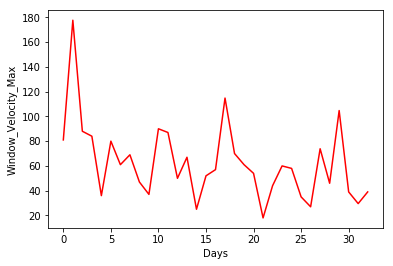

In [9]:
#Plotting
plt.plot(NewFeatureMatrix['Window_Velocity_Max'],'r-')
plt.ylabel('Window_Velocity_Max')
plt.xlabel('Days')

* ### Feature 2 - Windowed Mean

ZeroDivisionError: integer division or modulo by zero

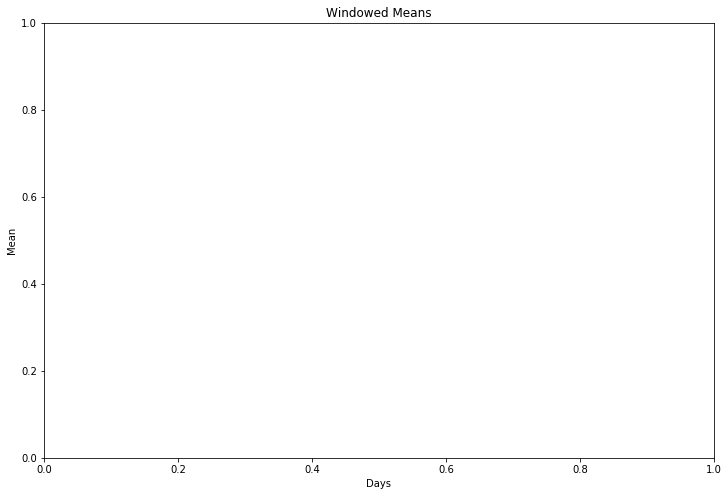

In [10]:
#Plotting
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_ylabel('Mean')
ax.set_xlabel('Days')
ax.set_title('Windowed Means')
ax.plot(NewFeatureMatrix.iloc[:,1:7],'-')
ax.legend(('Mean_0', 'Mean_6', 'Mean_12','Mean_18','Mean_24','Mean_30'),loc='upper right')

In [11]:
# Windowed mean interval - 30 mins(non-overlapping)
for i in range(0,31,6):
    NewFeatureMatrix['Mean_'+str(i)] = CGMSeries_updated.iloc[:,i:i+6].mean(axis = 1)
    
NewFeatureMatrix.head()

,Window_Velocity_Max,Mean_0,Mean_6,Mean_12,Mean_18,Mean_24,Mean_30
32,39.000000,75.666667,77.333333,82.833333,120.166667,150.333333,164.0
31,29.571429,98.738095,124.666667,124.666667,130.333333,120.333333,106.0
30,39.000000,91.309524,117.166667,113.000000,95.500000,82.833333,78.0
29,104.714286,171.380952,158.500000,102.500000,114.833333,147.833333,167.0
28,46.000000,104.619048,112.833333,137.333333,169.500000,172.333333,190.0


* ### Feature 3 - FFT

In [12]:
# FFT- Finding top 8 values for each row
def get_fft(row):
    cgmFFTValues = abs(scipy.fftpack.fft(row))
    cgmFFTValues.sort()
    return np.flip(cgmFFTValues)[0:8]

FFT = pd.DataFrame()
FFT['FFT_Top2'] = CGMSeries_updated.apply(lambda row: get_fft(row), axis=1)
FFT_updated = pd.DataFrame(FFT.FFT_Top2.tolist(), columns=['FFT_1', 'FFT_2', 'FFT_3', 'FFT_4', 'FFT_5', 'FFT_6', 'FFT_7', 'FFT_8'])

#FFT_updated.head()

NewFeatureMatrix = NewFeatureMatrix.join(FFT_updated)

NewFeatureMatrix.head()

,Window_Velocity_Max,Mean_0,Mean_6,Mean_12,Mean_18,Mean_24,Mean_30,FFT_1,FFT_2,FFT_3,FFT_4,FFT_5,FFT_6,FFT_7,FFT_8
32,39.000000,75.666667,77.333333,82.833333,120.166667,150.333333,164.0,5196.000000,1349.456351,1349.456351,344.274083,344.274083,316.787456,316.787456,200.039542
31,29.571429,98.738095,124.666667,124.666667,130.333333,120.333333,106.0,9298.333333,989.029956,989.029956,299.954120,299.954120,227.383884,227.383884,192.680423
30,39.000000,91.309524,117.166667,113.000000,95.500000,82.833333,78.0,5949.666667,1252.698954,1252.698954,252.065932,252.065932,224.128221,224.128221,142.577246
29,104.714286,171.380952,158.500000,102.500000,114.833333,147.833333,167.0,4679.000000,1128.069701,1128.069701,290.575522,290.575522,161.360985,161.360985,156.961011
28,46.000000,104.619048,112.833333,137.333333,169.500000,172.333333,190.0,4395.000000,385.823785,385.823785,65.209171,65.209171,51.423448,51.423448,43.689401


* ### Feature 4 - Entropy

In [13]:
# Calculates entropy(from occurences of each value) of given series
def get_entropy(series):
    series_counts = series.value_counts()
    entropy = scipy.stats.entropy(series_counts)  
    return entropy

NewFeatureMatrix['Entropy'] = CGMSeries_updated.apply(lambda row: get_entropy(row), axis=1) 
NewFeatureMatrix.head()

,Window_Velocity_Max,Mean_0,Mean_6,Mean_12,Mean_18,Mean_24,Mean_30,FFT_1,FFT_2,FFT_3,FFT_4,FFT_5,FFT_6,FFT_7,FFT_8,Entropy
32,39.000000,75.666667,77.333333,82.833333,120.166667,150.333333,164.0,5196.000000,1349.456351,1349.456351,344.274083,344.274083,316.787456,316.787456,200.039542,2.953038
31,29.571429,98.738095,124.666667,124.666667,130.333333,120.333333,106.0,9298.333333,989.029956,989.029956,299.954120,299.954120,227.383884,227.383884,192.680423,2.799768
30,39.000000,91.309524,117.166667,113.000000,95.500000,82.833333,78.0,5949.666667,1252.698954,1252.698954,252.065932,252.065932,224.128221,224.128221,142.577246,3.070316
29,104.714286,171.380952,158.500000,102.500000,114.833333,147.833333,167.0,4679.000000,1128.069701,1128.069701,290.575522,290.575522,161.360985,161.360985,156.961011,3.344549
28,46.000000,104.619048,112.833333,137.333333,169.500000,172.333333,190.0,4395.000000,385.823785,385.823785,65.209171,65.209171,51.423448,51.423448,43.689401,3.210391


* ### Final Feature Matrix

In [14]:
# Final feature matrix
NewFeatureMatrix.head()

,Window_Velocity_Max,Mean_0,Mean_6,Mean_12,Mean_18,Mean_24,Mean_30,FFT_1,FFT_2,FFT_3,FFT_4,FFT_5,FFT_6,FFT_7,FFT_8,Entropy
32,39.000000,75.666667,77.333333,82.833333,120.166667,150.333333,164.0,5196.000000,1349.456351,1349.456351,344.274083,344.274083,316.787456,316.787456,200.039542,2.953038
31,29.571429,98.738095,124.666667,124.666667,130.333333,120.333333,106.0,9298.333333,989.029956,989.029956,299.954120,299.954120,227.383884,227.383884,192.680423,2.799768
30,39.000000,91.309524,117.166667,113.000000,95.500000,82.833333,78.0,5949.666667,1252.698954,1252.698954,252.065932,252.065932,224.128221,224.128221,142.577246,3.070316
29,104.714286,171.380952,158.500000,102.500000,114.833333,147.833333,167.0,4679.000000,1128.069701,1128.069701,290.575522,290.575522,161.360985,161.360985,156.961011,3.344549
28,46.000000,104.619048,112.833333,137.333333,169.500000,172.333333,190.0,4395.000000,385.823785,385.823785,65.209171,65.209171,51.423448,51.423448,43.689401,3.210391


* ### PCA

In [15]:
# PCA
rows,cols = NewFeatureMatrix.shape

# Standardizes feature matrix
NewFeatureMatrix = StandardScaler().fit_transform(NewFeatureMatrix)

pca = PCA(n_components=5)
principalComponents = pca.fit(NewFeatureMatrix)
print(principalComponents.components_) # Principal Components vs Original Features

[[ 0.21341996  0.07955228  0.10401563  0.229792    0.28732079  0.26129718
   0.22991811 -0.19786868 -0.29132281 -0.29132281 -0.29562578 -0.29562578
  -0.2976126  -0.2976126  -0.30627372  0.16179821]
 [ 0.37363516  0.49174493  0.51469506  0.35919418  0.14458961  0.06673983
   0.05279056  0.11102323  0.13275019  0.13275019  0.19681321  0.19681321
   0.14779813  0.14779813  0.12893248  0.10559638]
 [-0.04128852  0.2805761   0.16068684 -0.02582    -0.29530654 -0.45497096
  -0.51812268  0.06693955  0.06050892  0.06050892 -0.17458659 -0.17458659
  -0.2211925  -0.2211925  -0.17689766  0.35849713]
 [-0.27146051 -0.00697168  0.09189578  0.25793141  0.18241615  0.04986596
  -0.05705084  0.69761961  0.0925902   0.0925902  -0.1657886  -0.1657886
  -0.1556946  -0.1556946  -0.03794991 -0.4511735 ]
 [ 0.01444221 -0.08934215 -0.2200141  -0.12138409  0.16050754  0.2599994
   0.21830432  0.20491642  0.45128495  0.45128495 -0.07891572 -0.07891572
  -0.07470743 -0.07470743 -0.04042883  0.55954513]]


In [16]:
print(principalComponents.explained_variance_ratio_.cumsum())

[0.52452396 0.71056946 0.81583518 0.8725954  0.92000277]


In [17]:
principalComponentsTrans = pca.fit_transform(NewFeatureMatrix)
PC_TimeSeries=pd.DataFrame(data=principalComponentsTrans,columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5'])
PC_TimeSeries.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-5.888874,0.290112,-2.410702,-0.790827,0.459767
1,-4.994351,0.756926,-0.707763,3.068399,-0.702987
2,-4.357612,0.044208,0.881001,0.372970,0.135714
3,-2.020636,2.639880,0.838166,-1.658986,0.910995
4,2.605061,-1.817804,1.037830,0.564602,0.001923


Plots

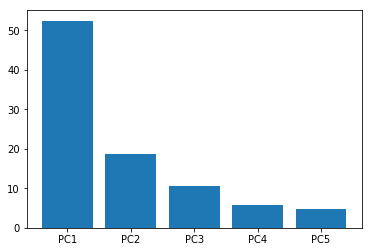

In [18]:
#plotting explained variance versus principle componenets
pcs = ['PC1','PC2','PC3','PC4','PC5']
plt.bar(pcs,principalComponents.explained_variance_ratio_*100)
plt.savefig('')

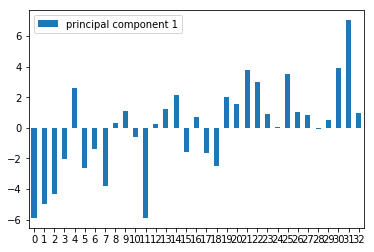

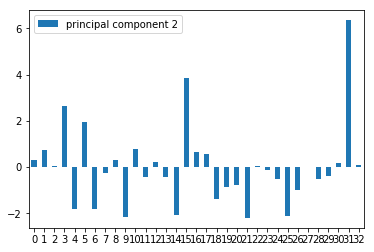

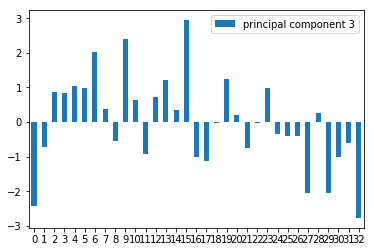

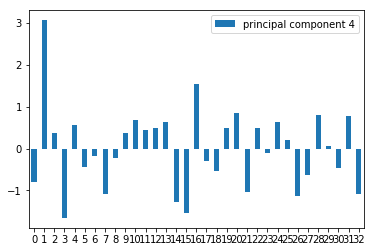

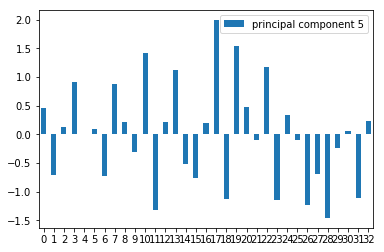

In [19]:
 #plotting top 5 principle components against each time series
ax = PC_TimeSeries.plot.bar(y='principal component 1', rot=0)
ax = PC_TimeSeries.plot.bar(y='principal component 2', rot=0)
ax = PC_TimeSeries.plot.bar(y='principal component 3', rot=0)
ax = PC_TimeSeries.plot.bar(y='principal component 4', rot=0)
ax = PC_TimeSeries.plot.bar(y='principal component 5', rot=0)

In [20]:
#plotting top 5 principle components against each time series


* ### RESULTS

In [21]:
# plots & prove assumptions

In [22]:
# patient-by-patient analysis